In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.svm import SVR

In [2]:
ds=pd.read_csv('LoL Data.csv')

In [3]:
ds.isnull().sum()

Team                     0
Player                   0
Opponent                 0
Position                 0
Champion                 0
Kills                    0
Deaths                   0
Assists                  0
Creep Score              0
Gold Earned              0
Champion Damage Share    0
Kill Participation       0
Wards Placed             0
Wards Destroyed          0
Ward Interactions        0
Dragons For              0
Dragons Against          0
Barons For               0
Barons Against           0
Result                   0
dtype: int64

In [4]:
len(ds)

215

In [5]:
ds.head()

,Team,Player,Opponent,Position,Champion,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against,Result
0,UOL,Boss,GS,Top,Camille,4,5,3,188,11107,0.17,0.78,8,8,16,0,4,0,1,L
1,GS,Crazy,UOL,Top,Gwen,3,1,9,217,12201,0.20,0.52,10,7,17,4,0,1,0,W
2,UOL,Ahahacik,GS,Jungle,Trundle,2,4,5,156,9048,0.15,0.78,8,14,22,0,4,0,1,L
3,GS,Mojito,UOL,Jungle,Talon,5,4,10,194,11234,0.23,0.65,12,8,20,4,0,1,0,W
4,UOL,Nomanz,GS,Mid,Leblanc,1,3,4,216,9245,0.29,0.56,6,9,15,0,4,0,1,L


In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Team                   215 non-null    object 
 1   Player                 215 non-null    object 
 2   Opponent               215 non-null    object 
 3   Position               215 non-null    object 
 4   Champion               215 non-null    object 
 5   Kills                  215 non-null    int64  
 6   Deaths                 215 non-null    int64  
 7   Assists                215 non-null    int64  
 8   Creep Score            215 non-null    int64  
 9   Gold Earned            215 non-null    int64  
 10  Champion Damage Share  215 non-null    float64
 11  Kill Participation     215 non-null    float64
 12  Wards Placed           215 non-null    int64  
 13  Wards Destroyed        215 non-null    int64  
 14  Ward Interactions      215 non-null    int64  
 15  Dragon

In [7]:
X=ds[['Deaths','Assists','Creep Score','Gold Earned','Champion Damage Share',
      'Kill Participation','Wards Placed','Wards Destroyed',
      'Dragons For','Barons For',]]

In [8]:
y=ds[['Kills']]

In [9]:
y.head()

,Kills
0,4
1,3
2,2
3,5
4,1


In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.8,random_state=12)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [13]:
print('Coefficioents',regressor.coef_)

Coefficioents [[-1.55593711e-01 -4.16883127e-02 -4.67910367e-02  1.58055969e-03
   7.22792022e+00  2.43820814e-01 -7.68587151e-02  2.91300589e-03
  -8.25796073e-02 -8.08302149e-01]]


In [14]:
print('Intercept',regressor.intercept_)

Intercept [-4.00224367]


In [15]:
X.head()

,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Dragons For,Barons For
0,5,3,188,11107,0.17,0.78,8,8,0,0
1,1,9,217,12201,0.20,0.52,10,7,4,1
2,4,5,156,9048,0.15,0.78,8,14,0,0
3,4,10,194,11234,0.23,0.65,12,8,4,1
4,3,4,216,9245,0.29,0.56,6,9,0,0


# SVR

In [16]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X,y)

C:\Users\Connor\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [17]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_y=StandardScaler()
X_train=sc_X.fit_transform(X_train)
y_train=sc_y.fit_transform(y_train)

# Training SVR

In [18]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X_train,y_train)

C:\Users\Connor\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [19]:
# Predicting
y_pred=sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))

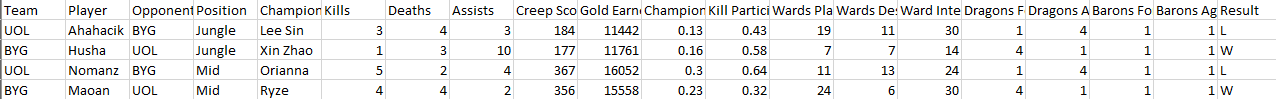

In [20]:
#Did not include Ward Int, Dragons Against, and Barons Against

In [21]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[4,3,184,11442,.13,.43,19,11,1,1]])).reshape(-1,1))

array([[0.90421902]])

In [22]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[3,10,177,11761,.16,.58,7,7,4,1]])).reshape(-1,1))

array([[3.93938801]])

In [23]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[2,4,367,16052,.3,.64,11,13,1,1]])).reshape(-1,1))

array([[5.11520941]])

In [24]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[4,2,356,15558,.23,.32,24,6,4,1]])).reshape(-1,1))

array([[2.71597959]])

# ModelPerformance

In [25]:
from sklearn.metrics import r2_score
print('R-Square',r2_score(y_test,y_pred))

R-Square 0.6019114052960055


In [26]:
from sklearn.metrics import mean_squared_error as msc
from math import sqrt
rms=sqrt(msc(y_test,y_pred))
print('The Mean Square error is', rms)

The Mean Square error is 1.509666251471904


# DTR

In [27]:
y_pred=regressor.predict(X_test)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [29]:
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [30]:
y_pred=regressor.predict(X_test)

## Predicting Using DTR

In [31]:
regressor.predict([[4,3,184,11442,.13,.43,19,11,1,1]])

array([0.])

In [32]:
regressor.predict([[3,10,177,11761,.16,.58,7,7,4,1]])

array([1.])

In [33]:
regressor.predict([[2,4,367,16052,.3,.64,11,13,1,1]])

array([6.])

In [34]:
regressor.predict([[4,2,356,15558,.23,.32,24,6,4,1]])

array([3.])

## Model Performance

In [35]:
print('R-Square',r2_score(y_test,y_pred))

R-Square -0.1969673592083212


In [36]:
from sklearn.metrics import mean_squared_error as msc
from math import sqrt
rms=sqrt(msc(y_test,y_pred))
print('The Mean Square error is', rms)

The Mean Square error is 2.757653198426281


# RFT

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [38]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=20,random_state=0)
regressor.fit(X,y)

<ipython-input-38-40255d4da7b6>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X,y)


RandomForestRegressor(n_estimators=20, random_state=0)

In [39]:
y_pred=regressor.predict(X_test)

# Predict using RFT

In [40]:
regressor.predict([[4,3,184,11442,.13,.43,19,11,1,1]])

array([1.65])

In [41]:
regressor.predict([[3,10,177,11761,.16,.58,7,7,4,1]])

array([3.55])

In [42]:
regressor.predict([[2,4,367,16052,.3,.64,11,13,1,1]])

array([5.65])

In [43]:
regressor.predict([[4,2,356,15558,.23,.32,24,6,4,1]])

array([4.5])

# Model Preformance

In [44]:
print('R-Square',r2_score(y_test,y_pred))

R-Square 0.9318035167992339


In [45]:
rms=sqrt(msc(y_test,y_pred))
print('The Mean Square error is', rms)

The Mean Square error is 0.6582327467068234


# Linear Regression

In [46]:
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [47]:
y_pred=regressor.predict(X_test)

# Predict Using LR

In [48]:
regressor.predict([[4,3,184,11442,.13,.43,19,11,1,1]])

array([[3.34131892]])

In [49]:
regressor.predict([[3,10,177,11761,.16,.58,7,7,4,1]])

array([[4.65506916]])

In [50]:
regressor.predict([[2,4,367,16052,.3,.64,11,13,1,1]])

array([[4.46400728]])

In [51]:
regressor.predict([[4,2,356,15558,.23,.32,24,6,4,1]])

array([[2.8872699]])

# Model Preformance

In [52]:
print('R-Square',r2_score(y_test,y_pred))

R-Square 0.7748989374579198


In [53]:
rms=sqrt(msc(y_test,y_pred))
print('The Mean Square error is', rms)

The Mean Square error is 1.1958790761647133


# Experiment Parameters

### LR

##### 80 20

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.8,random_state=20)

In [55]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [56]:
regressor.predict([[4,3,184,11442,.13,.43,19,11,1,1]])

array([[3.22743202]])

In [57]:
regressor.predict([[3,10,177,11761,.16,.58,7,7,4,1]])

array([[4.6007066]])

In [58]:
regressor.predict([[2,4,367,16052,.3,.64,11,13,1,1]])

array([[4.73374493]])

In [59]:
regressor.predict([[4,2,356,15558,.23,.32,24,6,4,1]])

array([[4.10366128]])

##### 70 30

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.70,random_state=15)

In [61]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [62]:
regressor.predict([[4,3,184,11442,.13,.43,19,11,1,1]])

array([[4.10405534]])

In [63]:
regressor.predict([[3,10,177,11761,.16,.58,7,7,4,1]])

array([[4.58880253]])

In [64]:
regressor.predict([[2,4,367,16052,.3,.64,11,13,1,1]])

array([[4.6906319]])

In [65]:
regressor.predict([[4,2,356,15558,.23,.32,24,6,4,1]])

array([[2.23608922]])

##### Square Root of 70 30 Split Test

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.70,random_state=15)

In [67]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [68]:
np.sqrt(regressor.predict([[4,3,184,11442,.13,.43,19,11,1,1]]))

array([[2.02584682]])

In [69]:
np.sqrt(regressor.predict([[3,10,177,11761,.16,.58,7,7,4,1]]))

array([[2.14214904]])

In [70]:
np.sqrt(regressor.predict([[2,4,367,16052,.3,.64,11,13,1,1]]))

array([[2.16578667]])

In [71]:
np.sqrt(regressor.predict([[4,2,356,15558,.23,.32,24,6,4,1]]))

array([[1.49535588]])

##### Square Root of 80 20 Split Test

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.8,random_state=20)

In [73]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [74]:
np.sqrt(regressor.predict([[4,3,184,11442,.13,.43,19,11,1,1]]))

array([[1.7965055]])

In [75]:
np.sqrt(regressor.predict([[3,10,177,11761,.16,.58,7,7,4,1]]))

array([[2.14492578]])

In [76]:
np.sqrt(regressor.predict([[2,4,367,16052,.3,.64,11,13,1,1]]))

array([[2.17571711]])

In [77]:
np.sqrt(regressor.predict([[4,2,356,15558,.23,.32,24,6,4,1]]))

array([[2.02574956]])

### SVR

##### 80 20

In [78]:
sc_X=StandardScaler()
sc_y=StandardScaler()
X_train=sc_X.fit_transform(X_train)
y_train=sc_y.fit_transform(y_train)

In [79]:
regressor=SVR(kernel='rbf')
regressor.fit(X_train,y_train)

C:\Users\Connor\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 20)

In [81]:
y_pred=sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))

In [82]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[4,3,184,11442,.13,.43,19,11,1,1]])).reshape(-1,1))

array([[1.78282387]])

In [83]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[3,10,177,11761,.16,.58,7,7,4,1]])).reshape(-1,1))

array([[4.05208246]])

In [84]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[2,4,367,16052,.3,.64,11,13,1,1]])).reshape(-1,1))

array([[4.82453906]])

In [85]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[4,2,356,15558,.23,.32,24,6,4,1]])).reshape(-1,1))

array([[3.87434632]])

##### 70 30

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.70, random_state = 30)

In [87]:
sc_X=StandardScaler()
sc_y=StandardScaler()
X_train=sc_X.fit_transform(X_train)
y_train=sc_y.fit_transform(y_train)

In [88]:
regressor=SVR(kernel='rbf')
regressor.fit(X_train,y_train)

C:\Users\Connor\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [89]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[4,3,184,11442,.13,.43,19,11,1,1]])).reshape(-1,1))

array([[1.37294327]])

In [90]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[3,10,177,11761,.16,.58,7,7,4,1]])).reshape(-1,1))

array([[3.57110508]])

In [91]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[2,4,367,16052,.3,.64,11,13,1,1]])).reshape(-1,1))

array([[4.48372524]])

In [92]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[4,2,356,15558,.23,.32,24,6,4,1]])).reshape(-1,1))

array([[2.67333426]])

##### Square Root 70 30

In [93]:
np.sqrt(sc_y.inverse_transform(regressor.predict(sc_X.transform([[4,3,184,11442,.13,.43,19,11,1,1]])).reshape(-1,1)))

array([[1.17172662]])

In [94]:
np.sqrt(sc_y.inverse_transform(regressor.predict(sc_X.transform([[3,10,177,11761,.16,.58,7,7,4,1]])).reshape(-1,1)))

array([[1.88973678]])

In [95]:
np.sqrt(sc_y.inverse_transform(regressor.predict(sc_X.transform([[2,4,367,16052,.3,.64,11,13,1,1]])).reshape(-1,1)))

array([[2.11748087]])

In [96]:
np.sqrt(sc_y.inverse_transform(regressor.predict(sc_X.transform([[4,2,356,15558,.23,.32,24,6,4,1]])).reshape(-1,1)))

array([[1.63503341]])

##### Square Root 80 20

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 20)

In [98]:
sc_X=StandardScaler()
sc_y=StandardScaler()
X_train=sc_X.fit_transform(X_train)
y_train=sc_y.fit_transform(y_train)

In [99]:
regressor=SVR(kernel='rbf')
regressor.fit(X_train,y_train)

C:\Users\Connor\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [100]:
np.sqrt(sc_y.inverse_transform(regressor.predict(sc_X.transform([[4,3,184,11442,.13,.43,19,11,1,1]])).reshape(-1,1)))

array([[1.33522428]])

In [101]:
np.sqrt(sc_y.inverse_transform(regressor.predict(sc_X.transform([[3,10,177,11761,.16,.58,7,7,4,1]])).reshape(-1,1)))

array([[2.0129785]])

In [102]:
np.sqrt(sc_y.inverse_transform(regressor.predict(sc_X.transform([[2,4,367,16052,.3,.64,11,13,1,1]])).reshape(-1,1)))

array([[2.19648334]])

In [103]:
np.sqrt(sc_y.inverse_transform(regressor.predict(sc_X.transform([[4,2,356,15558,.23,.32,24,6,4,1]])).reshape(-1,1)))

array([[1.96833593]])

### DTR

###### 80 20

In [104]:
y_pred=regressor.predict(X_test)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 20)

In [106]:
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [107]:
regressor.predict([[4,3,184,11442,.13,.43,19,11,1,1]])

array([2.])

In [108]:
regressor.predict([[3,10,177,11761,.16,.58,7,7,4,1]])

array([4.])

In [109]:
regressor.predict([[2,4,367,16052,.3,.64,11,13,1,1]])

array([9.])

In [110]:
regressor.predict([[4,2,356,15558,.23,.32,24,6,4,1]])

array([4.])

##### 70 30

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.70, random_state = 30)

In [112]:
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [113]:
regressor.predict([[4,3,184,11442,.13,.43,19,11,1,1]])

array([4.])

In [114]:
regressor.predict([[3,10,177,11761,.16,.58,7,7,4,1]])

array([8.])

In [115]:
regressor.predict([[2,4,367,16052,.3,.64,11,13,1,1]])

array([13.])

In [116]:
regressor.predict([[4,2,356,15558,.23,.32,24,6,4,1]])

array([2.])

###### Sqrt 70 30

In [117]:
np.sqrt(regressor.predict([[4,3,184,11442,.13,.43,19,11,1,1]]))

array([2.])

In [118]:
np.sqrt(regressor.predict([[3,10,177,11761,.16,.58,7,7,4,1]]))

array([2.82842712])

In [119]:
np.sqrt(regressor.predict([[2,4,367,16052,.3,.64,11,13,1,1]]))

array([3.60555128])

In [120]:
np.sqrt(regressor.predict([[4,2,356,15558,.23,.32,24,6,4,1]]))

array([1.41421356])

###### Sqrt 80 20

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 20)

In [122]:
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [123]:
np.sqrt(regressor.predict([[4,3,184,11442,.13,.43,19,11,1,1]]))

array([1.41421356])

In [124]:
np.sqrt(regressor.predict([[3,10,177,11761,.16,.58,7,7,4,1]]))

array([2.])

In [125]:
np.sqrt(regressor.predict([[2,4,367,16052,.3,.64,11,13,1,1]]))

array([3.])

In [126]:
np.sqrt(regressor.predict([[4,2,356,15558,.23,.32,24,6,4,1]]))

array([2.])

### RFT

##### 80 20

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 20)

In [128]:
regressor=RandomForestRegressor(n_estimators=20,random_state=0)
regressor.fit(X,y)

<ipython-input-128-93d3aab45076>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X,y)


RandomForestRegressor(n_estimators=20, random_state=0)

In [129]:
y_pred=regressor.predict(X_test)

In [130]:
regressor.predict([[4,3,184,11442,.13,.43,19,11,1,1]])

array([1.65])

In [131]:
regressor.predict([[3,10,177,11761,.16,.58,7,7,4,1]])

array([3.55])

In [132]:
regressor.predict([[2,4,367,16052,.3,.64,11,13,1,1]])

array([5.65])

In [133]:
regressor.predict([[4,2,356,15558,.23,.32,24,6,4,1]])

array([4.5])

##### 70 30

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 30)

In [135]:
regressor=RandomForestRegressor(n_estimators=20,random_state=0)
regressor.fit(X,y)

<ipython-input-135-93d3aab45076>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X,y)


RandomForestRegressor(n_estimators=20, random_state=0)

In [136]:
y_pred=regressor.predict(X_test)

In [137]:
regressor.predict([[4,3,184,11442,.13,.43,19,11,1,1]])

array([1.65])

In [138]:
regressor.predict([[3,10,177,11761,.16,.58,7,7,4,1]])

array([3.55])

In [139]:
regressor.predict([[2,4,367,16052,.3,.64,11,13,1,1]])

array([5.65])

In [140]:
regressor.predict([[4,2,356,15558,.23,.32,24,6,4,1]])

array([4.5])

##### Sqrt 70 30

In [141]:
np.sqrt(regressor.predict([[4,3,184,11442,.13,.43,19,11,1,1]]))

array([1.28452326])

In [142]:
np.sqrt(regressor.predict([[3,10,177,11761,.16,.58,7,7,4,1]]))

array([1.88414437])

In [143]:
np.sqrt(regressor.predict([[2,4,367,16052,.3,.64,11,13,1,1]]))

array([2.37697286])

In [144]:
np.sqrt(regressor.predict([[4,2,356,15558,.23,.32,24,6,4,1]]))

array([2.12132034])

##### Sqrt 80 20

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 20)

In [146]:
regressor=RandomForestRegressor(n_estimators=20,random_state=0)
regressor.fit(X,y)

<ipython-input-146-93d3aab45076>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X,y)


RandomForestRegressor(n_estimators=20, random_state=0)

In [147]:
y_pred=regressor.predict(X_test)

In [148]:
np.sqrt(regressor.predict([[4,3,184,11442,.13,.43,19,11,1,1]]))

array([1.28452326])

In [149]:
np.sqrt(regressor.predict([[3,10,177,11761,.16,.58,7,7,4,1]]))

array([1.88414437])

In [150]:
np.sqrt(regressor.predict([[2,4,367,16052,.3,.64,11,13,1,1]]))

array([2.37697286])

In [151]:
np.sqrt(regressor.predict([[4,2,356,15558,.23,.32,24,6,4,1]]))

array([2.12132034])

# Logistic Regression

In [186]:
X=ds[['Deaths','Assists','Creep Score','Gold Earned','Champion Damage Share',
      'Kill Participation','Wards Placed','Wards Destroyed',
      'Dragons For','Barons For',]]

In [187]:
y=ds['Result']

In [220]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8, random_state=20)

In [221]:
print(X_train)

     Deaths  Assists  Creep Score  Gold Earned  Champion Damage Share  \
184       1       10          285        15333                   0.23   
157       1        8          295        14645                   0.28   
205       3        5          290        12201                   0.20   
183       5        4          176        10388                   0.22   
79        1       13           43        10030                   0.05   
182       3       12          168        10498                   0.16   
200       4       10          231        13708                   0.24   
43        3        3          177         9721                   0.11   
145       1        0          266        11214                   0.18   
3         4       10          194        11234                   0.23   
18        4        2           27         5451                   0.08   
209       6        9           23         7594                   0.10   
196       0        6          208         9692     

In [222]:
print(y_train)

184    W
157    W
205    L
183    L
79     W
182    W
200    W
43     L
145    W
3      W
18     L
209    L
196    W
10     L
32     L
110    L
185    L
83     L
61     W
131    W
25     L
186    W
141    W
203    L
6      L
7      W
101    W
105    W
144    L
190    W
16     L
26     W
40     W
118    L
162    L
71     W
22     W
75     W
148    L
137    W
156    L
15     W
99     L
Name: Result, dtype: object


In [223]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [224]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
#'Deaths','Assists','Creep Score','Gold Earned','Champion Damage Share','Kill Participation','Wards Placed','Wards Destroyed',
#'Dragons For','Barons For'

In [225]:
print(classifier.predict(sc.transform([[4,3,184,11442,.13,.43,19,11,1,1]])))

['L']


In [226]:
print(classifier.predict(sc.transform([[3,10,177,11761,.16,.58,7,7,4,1]])))

['W']


In [227]:
print(classifier.predict(sc.transform([[2,4,367,16052,.3,.64,11,13,1,1]])))

['W']


In [228]:
print(classifier.predict(sc.transform([[4,2,356,15558,.23,.32,24,6,4,1]])))

['W']


# Logistic Regression 70/30 Test

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=30)

In [230]:
print(classifier.predict(sc.transform([[4,3,184,11442,.13,.43,19,11,1,1]])))

['L']


In [231]:
print(classifier.predict(sc.transform([[3,10,177,11761,.16,.58,7,7,4,1]])))

['W']


In [232]:
print(classifier.predict(sc.transform([[2,4,367,16052,.3,.64,11,13,1,1]])))

['W']


In [233]:
print(classifier.predict(sc.transform([[4,2,356,15558,.23,.32,24,6,4,1]])))

['W']
